### Build a Simple Workflow of Graph using LangGraph

#### State
Firs, define the state of the graph.

The state schema serves as the input schema for all nodes and Edges in the graph.

Let's use the TypedDict class from python's typing module as our schema, which provide type hints for the keys.

In [8]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info: str

#### Nodes
Nodes are just python functions.

The first positional argument is the state, as defined above.

Beacuse the state is a TypedDict with schema as defined above, each node can access they key, graph_state, with state ['graph_state'].

Each node returns a new value of the state key graph_state.

By default, the new value returned by each node will override the prior state value.

In [15]:
def start_play(state:State):
    print("Start_Play has been called")
    return {"graph_info": state['graph_info'] + " I am playing to play"}

def baseball(state:State):
    print("My Baseball node has been called")
    return {"graph_info": state['graph_info'] + " Baseball"}

def soccer(state:State):
    print("My Soccer node has been called")
    return {"graph_info": state['graph_info'] + " Soccer"}

In [6]:
import random
from typing import Literal

def random_play(state:State)-> Literal['baseball', 'soccer']:
    graph_info = state['graph_info']

    if random.random()>0.5:
        return 'baseball'
    else:
        return 'soccer'


### Graph construction

- Now, we build the graph from out components defined above.
- The StateGraph class is the graph class that we can use.
- First, we initialize a StateGraph with the State class we defined above.
- Then, we add our nodes and edges.
- We use the START Node, a special node that sends user input to the graph, to indicate where to start our graph.
- The END Node is a special node that represents a terminal node.
- Finally, we compile our graph to perform a few basci checks on the graph structure.
- We can visualize the graph as a Mermaid diagram.

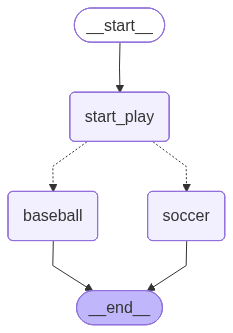

In [17]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

### Building the Graph
graph = StateGraph(State)

## Adding the nodes
graph.add_node("start_play", start_play)
graph.add_node("baseball", baseball)
graph.add_node("soccer", soccer)

## Schedule the flow of the graph

graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("baseball", END)
graph.add_edge("soccer", END)

## Compile the graph
graph_builder = graph.compile()

## View
display(Image(graph_builder.get_graph().draw_mermaid_png()))

### Graph invocation

In [20]:
graph_builder.invoke({"graph_info": "Hey my name is Luis"})

Start_Play has been called
My Soccer node has been called


{'graph_info': 'Hey my name is Luis I am playing to play Soccer'}